# 지도학습(2) - 회귀분석

단순 선형 회귀 분석으로 농어의 길이를 가지고 무게를 예측하는 모델을 만들어 보자

## #01. 작업준비

### 패키지 가져오기

In [1]:
import sys
import numpy as np
import seaborn as sb                                    # 데이터 시각화를 위한 모듈
from pandas import read_excel                           # 엑셀 데이터를 가져오기 위한 모듈
from matplotlib import pyplot as plt                    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리 모듈

### 데이터 가져오기

In [2]:
origin = read_excel("https://data.hossam.kr/F02/fish.xlsx")
origin = origin[["길이", "무게"]]
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


### 그래프 한글 설정

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 전처리

### 훈련데이터와 검증데이터 분할

- train data / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test data / 검증데이터 : 모델이 얼마나 잘 만들어졌는지 확인하는 용도

#### 데이터 프레임을 통째로 넣는 경우

데이터 프레임에 독립변수와 종속변수가 모두 포함되어 있는 형태

같은 유형으로 7:3으로 분할된 두 개의 데이터프레임이 반환된다.

In [4]:
train, test = train_test_split(origin, test_size=0.3, random_state=777)
# test_size는 검증데이터를 몇 %로 할 것인지 결정하는것, 보통 0.2를 사용한다. 
# 훈련 데이터는 자연스럽게 70%가 된다. 
# ranmdom은 컴퓨터가 미리 설정해놓은값 

In [5]:
train.head()

,길이,무게
8,19.6,85.0
0,8.4,5.9
15,22.0,120.0
26,24.6,188.0
51,42.0,1100.0


In [6]:
test.head()

,길이,무게
16,22.0,130.0
12,21.0,125.0
21,22.7,145.0
33,27.5,250.0
36,30.0,320.0


#### 데이터 프레임을 독립변수와 종속변수로 분리하여 사용하는 경우

독립변수를 7:3으로 분할한 형태와 종속변수를 7:3으로 분할한 형태가 반환된다.

총 4개의 데이터프레임이 리턴된다.

In [7]:
# 독립변수, 종속변수 분리
x_data = origin[["길이"]]
y_data = origin[["무게"]]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [9]:
x_train

,길이
8,19.6
0,8.4
15,22.0
26,24.6
51,42.0
2,15.0
6,18.7
4,17.4
42,37.0
30,27.3


In [10]:
x_test

,길이
16,22.0
12,21.0
21,22.7
33,27.5
36,30.0
17,22.0
11,21.0
9,20.0
35,28.7
52,43.0


In [11]:
y_train

,무게
8,85.0
0,5.9
15,120.0
26,188.0
51,1100.0
2,40.0
6,78.0
4,70.0
42,700.0
30,300.0


In [12]:
y_test

,무게
16,130.0
12,125.0
21,145.0
33,250.0
36,320.0
17,135.0
11,115.0
9,85.0
35,300.0
52,1000.0


## #03. 데이터 분석

### 선형회귀 분석 수행

In [13]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

print("y = {0:.2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))

계수:  [[37.01288998]]
절편:  [-636.25427098]
훈련 데이터 설명력:  0.9114180355953712
검증 데이터 설명력:  0.933893451951942
y = 37.01 * X + -636.25


### 분석 결과 시각화

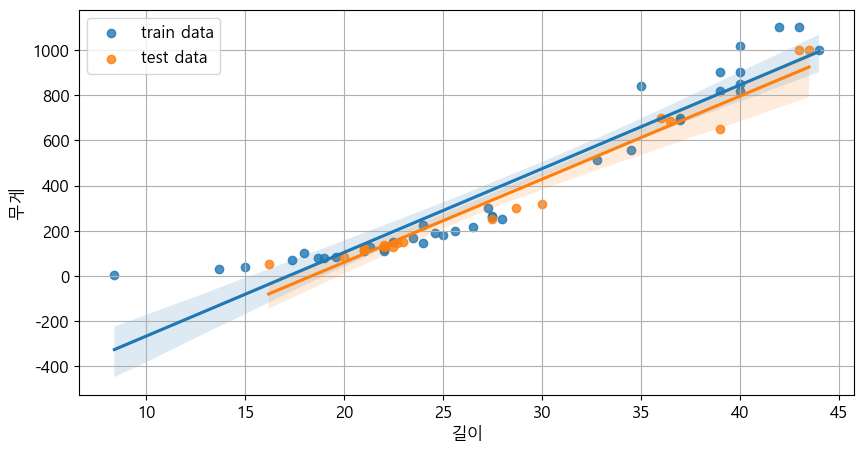

In [14]:
plt.figure(figsize=(10, 5))

# 원본 데이터 전체
# sb.regplot(data=origin, x="길이", y="무게")

# 학습에 사용된 데이터만으로 산점도 그래프 그리기
sb.regplot(x=x_train['길이'], y=y_train['무게'], label='train data')
# 검정 데이터만로 산점도 그래프 그리기
sb.regplot(x=x_test['길이'], y=y_test['무게'], label='test data')

plt.legend()
plt.grid()
plt.show()
plt.close()

> 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다.(=잔차가 크다)
>
> 과대적합의 냄새가 난다.

## #04. 과적합

### 과소적합(underfitting)

분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

![img](res/7.png)

모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

#### 해결방법

- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공

> 결국은 변수를 늘리라는 뜻

### 과대적합

훈련 데이터에 있는 잠음의 양이 모델에 비해 너무 복잡한 경우

설명력에 비해 잔차가 큰 경우라 할 수 있다.

![img](res/8.png)

#### 해결방법

- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임
- 모델을 단순화 시킴

> 결국은 변수를 줄이라는 뜻

- 훈련 데이터의 잡음을 줄임

> 이상치 제거

## #05. 다항회귀(단일피쳐 다항회귀, 곡선회귀)

데이터에 잘 맞는 일차 함수나 직선을 구하는 게 아니라 다항식이나 곡선을 구해서 학습하는 방법

하나의 입력 변수에 대하여 차수를 확장하여 다차원 회귀 모델을 도출한다.

![img](res/5.png)
![img](res/6.png)

### 데이터 전처리

#### 훈련 데이터의 독립변수 추가

In [15]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head()

,길이,길이^2
8,19.6,384.16
0,8.4,70.56
15,22.0,484.00
26,24.6,605.16
51,42.0,1764.00


#### 검증 데이터의 독립변수 추가

In [16]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head()

,길이,길이^2
16,22.0,484.00
12,21.0,441.00
21,22.7,515.29
33,27.5,756.25
36,30.0,900.00


### 분석

In [17]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

print("y = {0:.2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))

계수:  [[-23.92139238   1.06707967]]
절편:  [143.06821268]
훈련 데이터 설명력:  0.9741164053383602
검증 데이터 설명력:  0.9608757319315259
y = -23.92 * X + 143.07


### 분석 결과 시각화

7.0 46.0


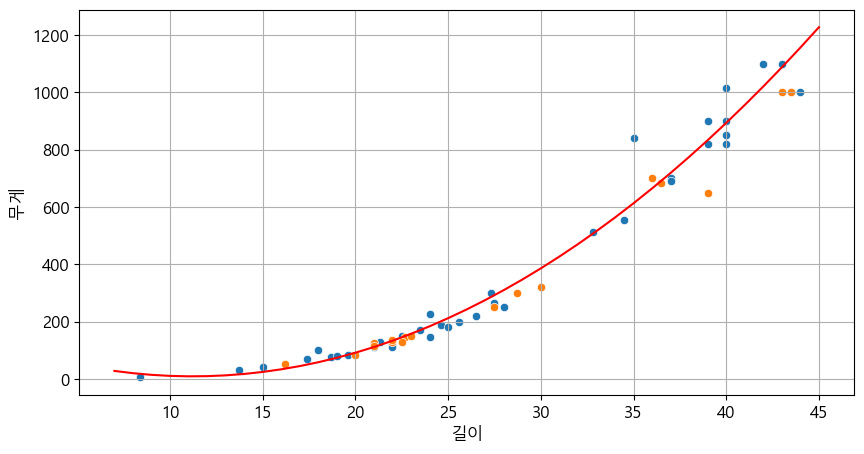

In [18]:
plt.figure(figsize=(10, 5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
#print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]
#print(y_pred)

sb.scatterplot(x=x_test['길이'], y=y_test['무게'])
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()

### 농어의 무게에 영향을 줄만한 피쳐들 추가

길이와 높이

![img](res/9.png)

> 이어서 계속...